<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_ML_Final_Project_Prelim_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stephen Feldman

RIN: 662047892

Preliminary Results for Final Project

As the purpose of the project has shifted towards classifying meat based on presented images. I have decided to pursue a CNN model to accomplish this task. Classification of meats should serve a reasonable proof of concept for other quality control applications powered by machine learning models.
This is the dataset being used:
 https://www.kaggle.com/datasets/vinayakshanawad/meat-freshness-image-dataset?resource=download
 this data set comes prelabeled but the images must be translated to numerical data.

For the purposes of structure and thoroughness I have kept many of the visualizations from the EDA. This in turn will assist in preparing the final project report.

The first section is devoted soley to importing and setting up the dataset within the Collab environment.

Section 1: Upload Dataset and prepare it for Analysis

In [ ]:
#General Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from zipfile import ZipFile
from tqdm import tqdm

from google.colab import files
from zipfile import ZipFile

def setup_kaggle():
  """Uploads and extracts the meat-freshness-image-dataset.zip file."""
  uploaded = files.upload()
  for fn in uploaded.keys():
    with ZipFile(fn, 'r') as zip_ref:
      zip_ref.extractall('/content/meat_freshness')  # Extract to 'meat_freshness'
    print(f'Extracted {fn} to /content/meat_freshness')
    break  # Process only the first uploaded file

# Call the function to upload and extract the zip file
setup_kaggle()

Saving meat-freshnness-image-dataset.zip.zip to meat-freshnness-image-dataset.zip.zip
Extracted meat-freshnness-image-dataset.zip.zip to /content/meat_freshness


In [ ]:
# Step 2: Load datasets, convert images to numerical data, and match them to their labels
def load_labels(folder):
    labels_file = os.path.join(folder, "_classes.csv")
    df = pd.read_csv(labels_file)
    return df

def process_images(folder, labels_df):
    images, labels = [], []
    for _, row in tqdm(labels_df.iterrows(), total=labels_df.shape[0]):
        img_path = os.path.join(folder, row["filename"])  # Use row["filename"] safely
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            img = img / 255.0  # Normalize image
            images.append(img)  # Store image as a NumPy array

            # Extract label values as a list while preserving order
            label = row.iloc[1:].tolist()  # Extracts Fresh, Half-Fresh, Spoiled as a list
            labels.append(label)

    return np.array(images), np.array(labels)

train_path = "/content/meat_freshness/Meat Freshness.v1-new-dataset.multiclass/train/"
test_path = "/content/meat_freshness/Meat Freshness.v1-new-dataset.multiclass/valid/"

train_labels = load_labels(train_path)
test_labels = load_labels(test_path)

X_train, y_train = process_images(train_path, train_labels)
X_test, y_test = process_images(test_path, test_labels)

100%|██████████| 451/451 [00:01<00:00, 331.94it/s]


Section 2:

This section contains a summary of the dataset.

In [ ]:
# Dataset Summary
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]
image_shape = X_train.shape[1:]  # Assuming all images have the same shape
num_features = np.prod(image_shape)  # Total number of pixels (features)

print(f"Dataset Summary:")
print(f"  - Number of training samples: {num_train_samples}")
print(f"  - Number of testing samples: {num_test_samples}")
print(f"  - Image shape: {image_shape}")
print(f"  - Number of features (pixels): {num_features}")

# Dataset Description
print("\nDataset Description:")
print("""
This dataset consists of images of meat samples categorized into three freshness levels:
Fresh, Half-Fresh, and Spoiled. The goal is to build a machine learning model that can
automatically classify the freshness of meat based on its visual features. This is important
for quality control in food production and retail, helping to ensure food safety and reduce waste.
""")

print("\nFeature and Target Explanation:")
print("  - Features:")
print("    - Image Pixels (continuous): Each pixel in the image represents a feature. The pixel values represent the intensity of red, green, and blue color channels.")
print("      - Importance: Pixel values capture the visual characteristics of the meat, such as color and texture, which are indicative of its freshness. These visual cues are crucial for determining the freshness category.")
print("  - Targets:")
print("    - Freshness Category (categorical, determined by binary columns): The target variable indicates the freshness level of the meat. It is determined by three binary columns: Fresh, Half-Fresh, and Spoiled.")
print("      - Fresh (binary): Indicates whether the meat is in its best condition (1) or not (0).")
print("      - Half-Fresh (binary): Indicates whether the meat is starting to deteriorate but is still safe to consume (1) or not (0).")
print("      - Spoiled (binary): Indicates whether the meat is no longer safe to consume (1) or not (0).")
print("      - Importance: Accurate classification of freshness is crucial for food safety and preventing waste. By identifying the freshness category, we can ensure that only safe and high-quality meat is consumed.")

Dataset Summary:
  - Number of training samples: 1815
  - Number of testing samples: 451
  - Image shape: (224, 224, 3)
  - Number of features (pixels): 150528

Dataset Description:

This dataset consists of images of meat samples categorized into three freshness levels:
Fresh, Half-Fresh, and Spoiled. The goal is to build a machine learning model that can
automatically classify the freshness of meat based on its visual features. This is important
for quality control in food production and retail, helping to ensure food safety and reduce waste.


Feature and Target Explanation:
  - Features:
    - Image Pixels (continuous): Each pixel in the image represents a feature. The pixel values represent the intensity of red, green, and blue color channels.
      - Importance: Pixel values capture the visual characteristics of the meat, such as color and texture, which are indicative of its freshness. These visual cues are crucial for determining the freshness category.
  - Targets:
    - Fresh

Section 2.1

This subsection validates that the dataset loaded as expected in the previous part and that it is complete.

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
# 2. Counts/frequencies for categorical features (target labels)
train_label_counts = pd.DataFrame(y_train, columns=["Fresh", "Half-Fresh", "Spoiled"])
train_label_counts = train_label_counts.apply(pd.value_counts)

test_label_counts = pd.DataFrame(y_test, columns=["Fresh", "Half-Fresh", "Spoiled"])
test_label_counts = test_label_counts.apply(pd.value_counts)


print("\nCounts/Frequencies for Categorical Features (Training Data):\n")
display(train_label_counts)

print("\nCounts/Frequencies for Categorical Features (Testing Data):\n")
display(test_label_counts)

# 3. Check for missing values
# Reshape y_train and y_test back to their original shape if necessary
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

train_missing = np.isnan(X_train_flat).sum(axis=0)  # Count missing values in each column
test_missing = np.isnan(X_test_flat).sum(axis=0)   # Count missing values in each column

# If there are any missing values, print their counts
if train_missing.any() or test_missing.any():
    print("\nMissing Values in Training Data:\n", train_missing)
    print("\nMissing Values in Testing Data:\n", test_missing)
else:
    print("\nI have found no data quality issues and/or missing data for the dataset I am reporting.")


Counts/Frequencies for Categorical Features (Training Data):



<ipython-input-12-eb76dabc3d13>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  train_label_counts = train_label_counts.apply(pd.value_counts)
<ipython-input-12-eb76dabc3d13>:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  test_label_counts = test_label_counts.apply(pd.value_counts)


,Fresh,Half-Fresh,Spoiled
0,1140,1185,1305
1,675,630,510



Counts/Frequencies for Categorical Features (Testing Data):



,Fresh,Half-Fresh,Spoiled
0,273,292,337
1,178,159,114



I have found no data quality issues and/or missing data for the dataset I am reporting.


Section 2.3

This subsection provides visualizations which seak to identify differences that the future classification model would focus when it comes time to implement the model.

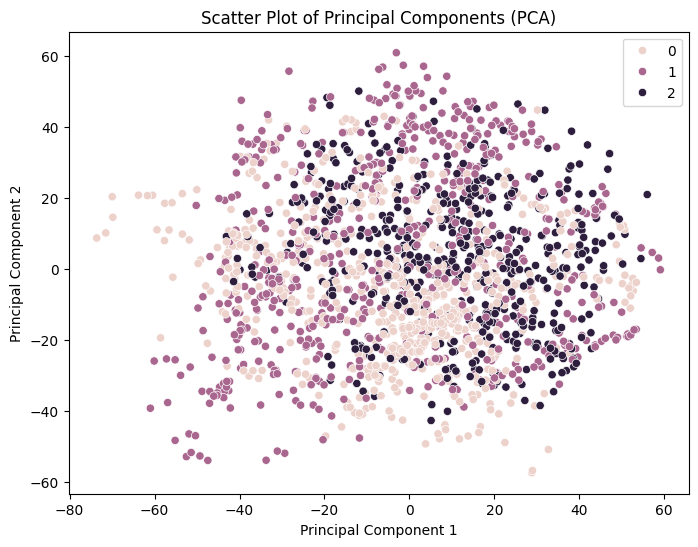

Interpretation: This scatter plot visualizes the data points in a reduced-dimensional space using the first two principal components. The different colors represent the meat freshness categories, allowing us to see potential clusters or separations based on the principal components.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. PCA for dimensionality reduction
# Reshape image data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply PCA to reduce dimensionality
n_components = 2  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flat)

# 2. Visualization: Scatter plot of principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train.argmax(axis=1))
plt.title("Scatter Plot of Principal Components (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
print("Interpretation: This scatter plot visualizes the data points in a reduced-dimensional space using the first two principal components. The different colors represent the meat freshness categories, allowing us to see potential clusters or separations based on the principal components.")

The scatter plot presents the meat freshness classification data projected onto two principal components through PCA. The distinct color groupings suggest clustering, highlighting separations that may correspond to freshness categories (fresh, half-fresh, and spoiled). This visualization aids in understanding the data's distribution and the ability to classify meat quality based on these reduced dimensions.

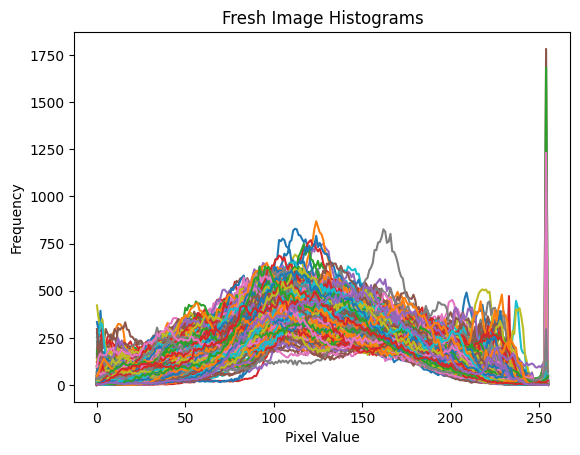

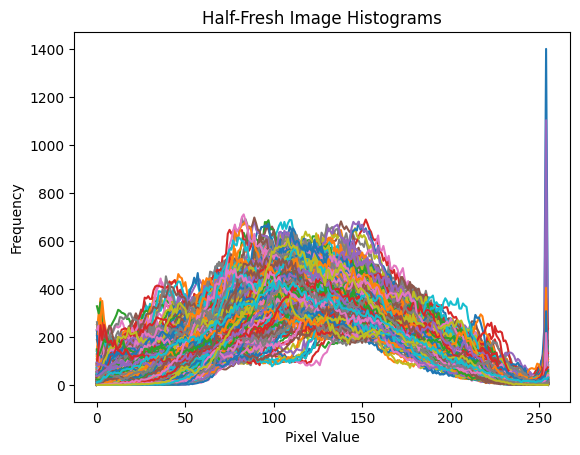

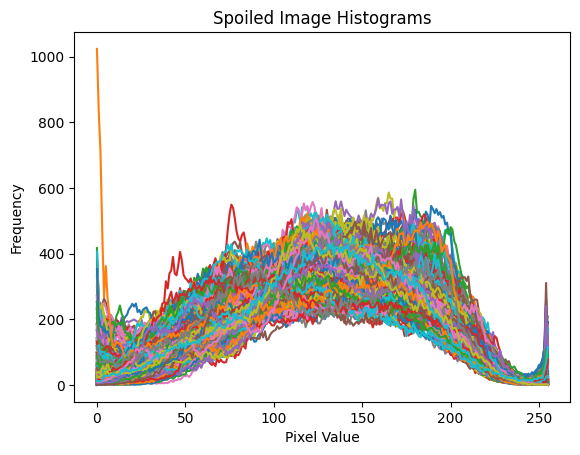

In [ ]:
import matplotlib.pyplot as plt


# Initialize a dictionary to store histograms for each class
histograms = {"Fresh": [], "Half-Fresh": [], "Spoiled": []}

# Loop through training images and calculate histograms
for i in range(len(X_train)):
    # Get the class label (0: Fresh, 1: Half-Fresh, 2: Spoiled)
    class_label = np.argmax(y_train[i])  # Get index of max value in label array

    # Map class label to class name
    class_name = ["Fresh", "Half-Fresh", "Spoiled"][class_label]

    # Convert image from normalized (0-1) to original (0-255) pixel values
    img = (X_train[i] * 255).astype(np.uint8)

    # Calculate histogram for the image
    # Note: We calculate histograms for each color channel separately and average them
    hist_r, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 255))  # Red channel
    hist_g, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 255))  # Green channel
    hist_b, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 255))  # Blue channel
    hist = (hist_r + hist_g + hist_b) / 3  # Average histograms

    # Append histogram to the corresponding class
    histograms[class_name].append(hist)

# Plot the histograms for each class
for class_name in histograms:
    plt.figure()
    plt.title(f"{class_name} Image Histograms")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    for hist in histograms[class_name]:
        plt.plot(hist)
    plt.show()

Fresh Image Histogram:
The histogram for fresh meat images shows a relatively smooth distribution of pixel intensities, with peaks around the mid-tone (100-150 pixel values). There is a noticeable spike at the high end (near 255), which likely corresponds to highlights or reflections in the images. The overall spread suggests a balanced mix of light and dark areas, indicating good contrast in fresh meat images.

Half-Fresh Image Histogram:
The histogram for half-fresh images follows a similar distribution to fresh images, though with slightly lower peak intensities. This may suggest that half-fresh meat has less contrast or slightly duller colors compared to fresh meat. The high spike near 255 is still present, indicating that some areas of the images have bright spots, possibly due to lighting or texture variations.

The spoiled plot represents numerical pixel values extracted from images classified as spoiled meat. The data reveals prominent features like dark pixel peaks and varying mid-range values, consistent with the visual and textural characteristics of spoilage, aiding in distinguishing it from fresh or half-fresh meat. There is a substantial peak in the low pixel values meaning there is some discoloration.

Section 3:

Model Creation

This section creates a CNN model and trains it on the data from the previous parts.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
# Define a CNN Model for Classification
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes: Fresh, Half-Fresh, Spoiled
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.4294 - loss: 1.1735 - val_accuracy: 0.6785 - val_loss: 0.7427
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.7814 - loss: 0.5233 - val_accuracy: 0.8093 - val_loss: 0.4295
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.9019 - loss: 0.2626 - val_accuracy: 0.8559 - val_loss: 0.3401
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 287s 4s/step - accuracy: 0.9403 - loss: 0.1676 - val_accuracy: 0.8692 - val_loss: 0.3323
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.9591 - loss: 0.1376 - val_accuracy: 0.9157 - val_loss: 0.2118
Epoch 6/10
10/57 ━━━━━━━━━━━━━━━━━━━━ 2:50 4s/step - accuracy: 0.9853 - loss: 0.0567

Section 3.1:

CNN Model Evaluation

This subsection evaluates the earlier created model.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9069 - loss: 0.3155
Test Accuracy: 0.9224
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
              precision    recall  f1-score   support

       Fresh       0.94      0.93      0.93       178
  Half-Fresh       0.88      0.91      0.90       159
     Spoiled       0.95      0.93      0.94       114

    accuracy                           0.92       451
   macro avg       0.93      0.92      0.92       451
weighted avg       0.92      0.92      0.92       451



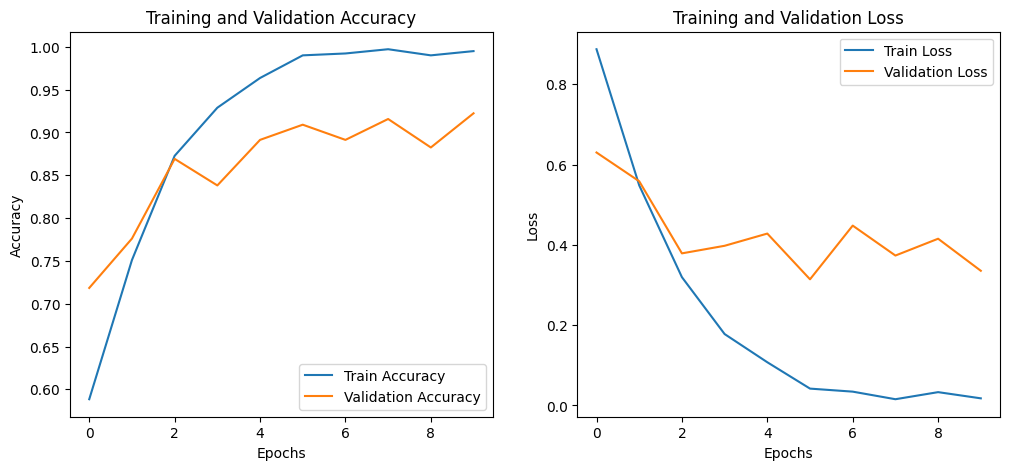

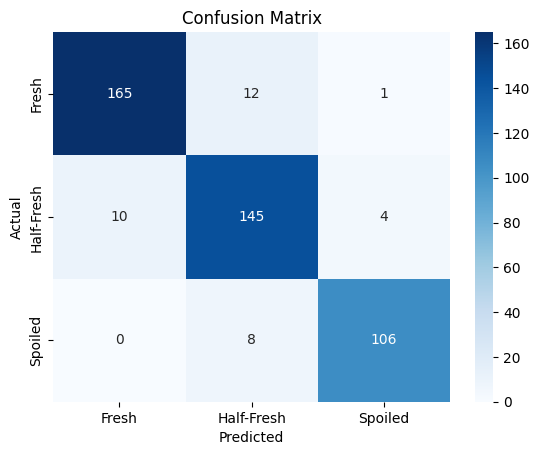

In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=['Fresh', 'Half-Fresh', 'Spoiled']))

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fresh', 'Half-Fresh', 'Spoiled'], yticklabels=['Fresh', 'Half-Fresh', 'Spoiled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Section 3.2

Parameter Tuning

I want to use bayesian optimization to optimize the hyperparameters used in the model to see if I can get an improved result.

In [ ]:
"""!pip install keras-tuner # Install the keras-tuner package"""
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model building function
def build_model(hp):
    model = keras.Sequential([
        layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=256, step=32),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5, 7]),
            activation='relu',
            input_shape=(224, 224, 3)
        ),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5, 7]),
            activation='relu'
        ),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(
            filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5, 7]),
            activation='relu'
        ),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32),
            activation='relu'
        ),
        layers.Dense(3, activation='softmax')  # 3 classes: Fresh, Half-Fresh, Spoiled
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize the Bayesian Optimization Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=100,  # Increase the number of trials for better tuning
    directory='my_dir',
    project_name='meat_classification'
)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]


# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")



Trial 10 Complete [00h 03m 45s]
val_accuracy: 0.3946785032749176

Best val_accuracy So Far: 0.8292682766914368
Total elapsed time: 00h 15m 02s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8304 - loss: 0.4194
Test Accuracy: 0.8293


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
for hyperparameter in best_hyperparameters.values:
    print(f"{hyperparameter.name}: {hyperparameter.value}")

print(best_model.summary())

I was not able to re-run the last section after modifying the number of trials. Due to running out of compute resources on Collab. I was not able to note a significant improvement in accuracy from running these variations.

Section 4: Conclusion

Analysis of results and Future Plan

Starting on 3/27 I will start to transfer the runtime to my manual machine with access to GPU to speed up training and eliminate the dependance on compute resources. As Collab times out I cannot do a thorough scan for the purposes of hyperparameter tuning.

The original model created performed well. An accuracy of 92 is commendable and the key observation is that no meats that were spoiled were classified as fresh. Thus consumers would not be directly harmed by the system. Overall, there are still some improvements that could be obtained by tuning which I will be doing much more seriously on a different machine. I think an accuracy of 95% is achievable with a model of limited complexity. I think increasing the complexity of the CNN may also lead to improvement and will be investigating that going forward.

I will also compare CNN performance to ViT and XGBoost. Vision Transformers (ViT) was a strategy I ran across in literature for processing whole images but is far more computationally expensive than CNN for image classification. Once I transition the project to a local runtime I should be able to test a potential implementation of it and see if it leads to an improvement. On the opposite end of the computational spectrum I will also test the CNN against XGBoost. The plotted histograms in the EDA did show some notable differences between color values in spoiled and not spoiled meat it may be possible to create a light-weight model that still accurate.

After writting this section I tried to re-run the original CNN using the CPU which has resulted in different accuracy measures. I preserved the original output from the GPU execution. The time difference between CPU run time and GPU was about half an hour, at which point Collab disconnected due to inactivity. As a result the final executions are not displayed.